这段代码的功能是比较两张图像中特定行上的灰度变化趋势。
读取两张图像，并获取图像尺寸和形状。
在两张图像上绘制相同位置的直线。
分别提取两张图像中直线所在行的灰度值。
绘制两张图像的灰度变化曲线。
显示图像和曲线。

y1是img_colour1的0-w1行之间，第h_position1行，第0通道的值，查看下y1的数值内容：
[ 98  98  97 100 101  96  98  98 100  99  99  98  99  97  99  99 100 100
 101  96  97  96 100 104  94  69  41  32  30  28  28  30  28  31  30  32
  34  36  36  36  34  39  39  39  36  33  32  27  30  35  42  41  36  35
  34  34  37  38  42  39  38  39  39  35  30  24  27  42  66  96 116 127
 131 132 130 127 122 123 125 128 133 138 137 139 140 140 138 137 140 142
 139 140 138 136 139 142 143 142 142 143 144 142 142 143 144 144 143 143
 141 140 142 143 140 137 129 128 128 132 134 134 137 138 138 142 139 137
 137 135 134 136 134 133 133 130 131 133 131 128 128 128 127 124 125 122
 121 119 117 119 115 115 110 110 108 106 107 113 126 138 150 159 167 170
 175 179 179 181 181 181 180 182 183 183 185 187 192 194 195 199 201 204
 204 207 208 208 209 210 207 209 209 208 208 207 206 202 198 195 193 192
 192 191 194 198 202 200 200 201 202 203 200 202 199 197 194 194 185 173
 157 138 121 108 101  96  94  91  94  92  87  86  84 255 255 255  56

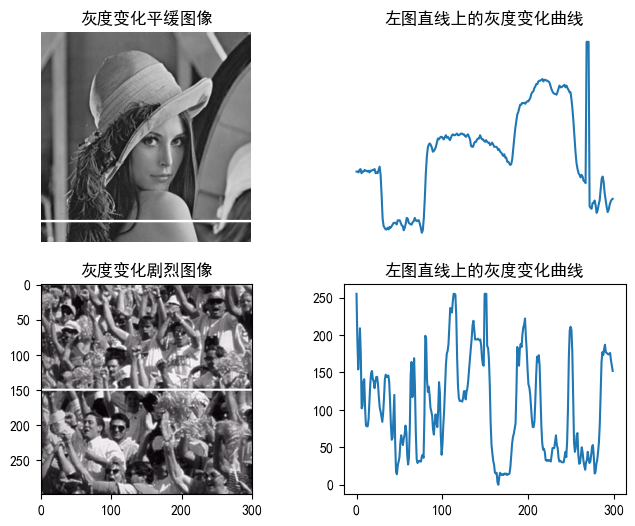

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.family']=['SimHei'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# img= cv2.imread(r'..\img\lena.bmp',0)
# [w,h]=img_color.shape
# cv2.line(img,(0,100),(w-1,100),(0,0,255),3) # 在灰度图像上绘制一条蓝色线条
img_color1= cv2.imread(r'..\img\lena.bmp')
img_color2= cv2.imread(r'..\img\crowd.png')
[w1,h1,d1]=img_color1.shape   # 获取图像尺寸
[w2,h2,d2]=img_color2.shape   # 获取图像尺寸
h_position1=230    # 定义水平位置
h_position2=150    # 定义水平位置


"""
img_color1: 这是要绘制直线的图像矩阵。
(0, h_position1): 这是直线的起始点，位于图像的左侧边缘和垂直位置 h_position1。
(w1-1, h_position1): 这是直线的结束点，位于图像宽度减一的右侧边缘和相同的垂直位置 h_position1。
(255, 255, 255): 这是直线的颜色，白色。
2: 这是直线的粗细，设置为 2 像素宽。
cv2.line函数需要图像是彩色的，如果图像是灰度图，需要先转换为彩色
"""
cv2.line(img_color1,(0,h_position1),(w1-1,h_position1),(255,255,255),2)  
cv2.line(img_color2,(0,h_position2),(w2-1,h_position2),(255,255,255),2)  

plt.figure(figsize=(8,6)) #figsize=(8,6) 表示创建了一个新的matplotlib图形窗口，宽度为8英寸、高度为6英寸

"""plt.subplot(2, 2, 1) 是 matplotlib 库中用于创建子图的函数调用
2：这是 subplot 函数的第一个参数，表示网格的行数。在这个例子中，2 表示网格有2行
2：第二个参数，表示网格的列数。在这个例子中，2 表示网格有2列
1：第三个参数，表示当前激活的子图位置。在这个2行2列的网格中，1 表示第一行第一列的位置，即左上角的子图
plt.subplot(2,2,1) 的参数为 (2, 2, 1)，表示创建一个 2x2 的子图，并选择第一个子图
"""
plt.subplot(2,2,1) # 绘制第一行第1个图像 
plt.imshow(img_color1)
plt.title('灰度变化平缓图像')
plt.axis('off') #闭绘图中轴元素（x 轴和 y 轴）的可见性

"""在 Python 中，函数调用 时，需要使用逗号来分隔不同的参数。因此，plt.subplot(2,2,1) 需要使用逗号来分隔
nrows、ncols 和 index 参数。在 Python 中，整数可以省略逗号。因此，plt.subplot(222) 可以省略逗号.
"""
plt.subplot(222)  # 绘制第一行第2个图像 

"""用于提取img_color1图像中第 h_position1 行所有像素的蓝色通道值,由于蓝色通道值代表灰度值，
因此 y1 数组存储了该行所有像素的灰度值.
img_color1: 一个三维 NumPy 数组，存储图像的像素数据.
0:w1: 表示图像的宽度范围，从0到w1-1；
h_position1:表示图像的高度位置，从0到h-1，
0: 表示图像的通道索引，从0到2，分别代表蓝色、绿色和红色通道
"""
y1=img_color1[0:w1,h_position1,0]
print(f"y1是img_color1的0-w1行之间，第h_position1行，第0通道的值，查看下y1的数值内容：\n{y1}")

plt.title('左图直线上的灰度变化曲线') 
#使用 matplotlib 库绘制一条折线图，range(w1): 生成一个从 0 到 w1-1 的序列，用于表示 x 轴坐标，即图像的宽度。
#y1: 存储图像指定行指定通道的像素数据，用于表示 y 轴坐标，这条曲线可以反映出图像中第 h_position1 行的灰度变化趋势。
plt.plot(range(w1), y1) 
plt.axis("off") #闭绘图中轴元素（x 轴和 y 轴）的可见性

plt.subplot(2,2,3)  
plt.imshow(img_color2)
plt.title('灰度变化剧烈图像')
plt.axis("on")
plt.subplot(224)  # 绘制第一个图像 
y2=img_color2[0:w2,h_position2,0]
plt.plot(range(w2), y2) 
plt.title('左图直线上的灰度变化曲线') 
plt.axis("on")
plt.show()




